In [1]:
import numpy as np
import tensorflow as tf
from tf.keras.layers import Dense, LSTM
from tf.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
help(ssms.basic_simulators.simulator)

Help on function simulator in module ssms.basic_simulators.simulator:

simulator(theta, model='angle', n_samples=1000, delta_t=0.001, max_t=20, no_noise=False, bin_dim=None, bin_pointwise=False)
    Basic data simulator for the models included in HDDM. 
    
    
    :Arguments:
        theta : list or numpy.array
            Parameters of the simulator. If 2d array, each row is treated as a 'trial' 
            and the function runs n_sample * n_trials simulations.
        model: str <default='angle'>
            Determines the model that will be simulated.
        n_samples: int <default=1000>
            Number of simulation runs (for each trial if supplied n_trials > 1)
        n_trials: int <default=1>
            Number of trials in a simulations run (this specifically addresses trial by trial parameterizations)
        delta_t: float
            Size fo timesteps in simulator (conceptually measured in seconds)
        max_t: float
            Maximum reaction the simulator can r

In [2]:
y_test = ssms.basic_simulators.simulator(theta = [0, 1, 0.5, 1, 0.5], n_samples = 10)

In [94]:
y_test

{'rts': array([[1.8739923],
        [1.2280003],
        [1.3649988],
        [1.7079945],
        [1.2999997],
        [1.3459991],
        [1.2240002],
        [1.3029996],
        [1.2620002],
        [2.0419927]], dtype=float32),
 'choices': array([[-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [-1]], dtype=int32),
 'metadata': {'v': array([0.], dtype=float32),
  'a': array([1.], dtype=float32),
  'z': array([0.5], dtype=float32),
  't': array([1.], dtype=float32),
  's': 1.0,
  'theta': array([0.5], dtype=float32),
  'delta_t': 0.0010000000474974513,
  'max_t': 20.0,
  'n_samples': 10,
  'simulator': 'ddm_flexbound',
  'boundary_fun_type': 'angle',
  'possible_choices': [-1, 1],
  'trajectory': array([[ 0.0000000e+00],
         [-2.6722709e-04],
         [ 6.1162185e-02],
         ...,
         [-9.9900000e+02],
         [-9.9900000e+02],
         [-9.9900000e+02]], dtype=float32),
  'boundary': array([

In [3]:
#Call a basic simulator
x = ssms.basic_simulators.simulator(theta = [0, 1, 0.5, 1, 0.5], n_samples = 1000)
#Extract the rts and choice into a tuple
tupleCouple = (x['rts'], x['choices'])
#Turn tuple into np array
data = np.transpose(np.squeeze(np.array(tupleCouple)))
bins = np.linspace(0.0,10.0,65)


onesBool = data[:,1] == 1
oneArray = data[:,0][onesBool]
minusOnesBool = data[:,1] == -1
minusOneArray = data[:,0][minusOnesBool]

oneInds = np.histogram(oneArray, bins)
minusOneInds = np.histogram(minusOneArray, bins)
np.append(oneInds[0], minusOneInds[0])

array([  0,   0,   0,   0,   0,   0,   2,  75, 107, 107,  77,  77,  30,
        20,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   2,  68, 115,  97,  85,  70,  39,  21,
         2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [85]:
finalArray

array([[  0,   0,   0,   0,   0,   0,   1,  61, 108,  87,  90,  55,  42,
         19,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,  62, 118, 124,  96,  62,  40,
         21,   7,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [55]:

tupleCouple2 = (oneArray, minusOneArray)
dataCouple = np.transpose(np.squeeze(np.array(tupleCouple2)))


/users/avo2/miniconda3/envs/tf_test/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [110]:
np.zeros((1,64))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [50]:
num_dim = 4
priorUnif = utils.BoxUniform(low=[-3.0, 0.3, 0.1, 0.0], high=[3.0, 2.5, 0.9, 2.0])

In [51]:
priorUnif.sample(1)

TypeError: 'int' object is not iterable

In [4]:
#assuming fixing theta at 0.5
def simulator(parameter_set):
    fullParams = torch.cat((parameter_set, torch.tensor([0.5])),0)
    #Call a basic simulator
    x = ssms.basic_simulators.simulator(theta = fullParams, n_samples = 1000)
    #Extract the rts and choice into a tuple
    tupleCouple = (x['rts'], x['choices'])
    #Turn tuple into np array
    data = np.transpose(np.squeeze(np.array(tupleCouple)))
    bins = np.linspace(0.0,10.0,65)


    onesBool = data[:,1] == 1
    oneArray = data[:,0][onesBool]
    minusOnesBool = data[:,1] == -1
    minusOneArray = data[:,0][minusOnesBool]

    oneInds = np.histogram(oneArray, bins)
    minusOneInds = np.histogram(minusOneArray, bins)
    finalArray = np.append(oneInds[0], minusOneInds[0])
    return finalArray

In [41]:
help(prepare_for_sbi)

Help on function prepare_for_sbi in module sbi.utils.user_input_checks:

prepare_for_sbi(simulator: Callable, prior) -> Tuple[Callable, torch.distributions.distribution.Distribution]
    Prepare simulator, prior and for usage in sbi.
    
    One of the goals is to allow you to use sbi with inputs computed in numpy.
    
    Attempts to meet the following requirements by reshaping and type-casting:
    
    - the simulator function receives as input and returns a Tensor.<br/>
    - the simulator can simulate batches of parameters and return batches of data.<br/>
    - the prior does not produce batches and samples and evaluates to Tensor.<br/>
    - the output shape is a `torch.Size((1,N))` (i.e, has a leading batch dimension 1).
    
    If this is not possible, a suitable exception will be raised.
    
    Args:
        simulator: Simulator as provided by the user.
        prior: Prior as provided by the user.
    
    Returns:
        Tuple (simulator, prior, x_shape) checked and ma

In [35]:
def cosimulator(parameter_set):
    fullParams = torch.cat((parameter_set, torch.tensor([0.5])),0)
    #Call a basic simulator
    x = ssms.basic_simulators.simulator(theta = fullParams, n_samples = 1000)
    #Extract the rts and choice into a tuple
    tupleCouple = (x['rts'], x['choices'])
    #Turn tuple into np array
    data = np.transpose(np.squeeze(np.array(tupleCouple)))
    bins = np.linspace(0.0,10.0,65)


    onesBool = data[:,1] == 1
    oneArray = data[:,0][onesBool]
    minusOnesBool = data[:,1] == -1
    minusOneArray = data[:,0][minusOnesBool]

    oneInds = np.histogram(oneArray, bins)
    minusOneInds = np.histogram(minusOneArray, bins)
    finalArray = np.append(oneInds[0], minusOneInds[0])
    return (finalArray, data)

TypeError: 'function' object is not subscriptable

In [54]:
#Try presimulated data because it feels like we need it
number_presimulated = 5
simulatory, priory = prepare_for_sbi(simulator, priorUnif)
theta_presimulated = priory.sample((number_presimulated,))
x_presimulated = simulatory(theta_presimulated)
inference = SNPE(simulatory, priory)
inference.provide_presimulated(theta_presimulated, x_presimulated, from_round=0)

AttributeError: 'function' object has no attribute 'sample'

In [57]:
priory.sample((1,))

tensor([[-1.2064,  1.4801,  0.3955,  0.6805]])

In [138]:
torch.cat((torch.tensor([0.5]), torch.tensor([0.5])),0)

tensor([0.5000, 0.5000])

In [10]:
posterior = infer(simulator, priorUnif, method='SNPE', num_simulations=1000)

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Neural network successfully converged after 129 epochs.


In [7]:

observation = simulator(torch.tensor([0, 1, 0.5, 1]))

In [27]:
help(ssms.config.data_generator_config)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwarg

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

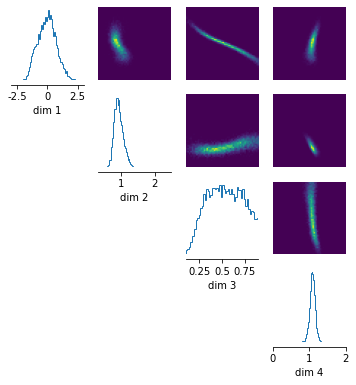

In [14]:
samples = posterior.sample((10000,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)
#low=[-3.0, 0.3, 0.1, 0.0, 0.5], high=[3.0, 2.5, 0.9, 2.0, 0.5]
_ = analysis.pairplot(samples, limits=[[-3,3],[.3,2.5],[.1,.9], [0.0,2.0]], figsize=(6,6))

In [22]:
sample_lite = posterior.sample((2,), x = observation)
fullParams = torch.cat((sample_lite, torch.tensor([0.5])),0)

Drawing 2 posterior samples:   0%|          | 0/2 [00:00<?, ?it/s]

TypeError: tensor() takes 1 positional argument but 2 were given

In [19]:
sample_lite

tensor([-0.3023,  0.9663,  0.6194,  1.0445])

In [31]:
np.random.seed(0)

In [34]:
ssms.basic_simulators.simulator(theta = [0,1,0.5,1,0.5], n_samples = 5)

{'rts': array([[1.6469953],
        [1.5979959],
        [1.6899947],
        [1.2000003],
        [1.6899947]], dtype=float32),
 'choices': array([[ 1],
        [ 1],
        [-1],
        [-1],
        [-1]], dtype=int32),
 'metadata': {'v': array([0.], dtype=float32),
  'a': array([1.], dtype=float32),
  'z': array([0.5], dtype=float32),
  't': array([1.], dtype=float32),
  's': 1.0,
  'theta': array([0.5], dtype=float32),
  'delta_t': 0.0010000000474974513,
  'max_t': 20.0,
  'n_samples': 5,
  'simulator': 'ddm_flexbound',
  'boundary_fun_type': 'angle',
  'possible_choices': [-1, 1],
  'trajectory': array([[ 0.0000000e+00],
         [ 5.1344927e-02],
         [ 4.8062414e-02],
         ...,
         [-9.9900000e+02],
         [-9.9900000e+02],
         [-9.9900000e+02]], dtype=float32),
  'boundary': array([ 1.       ,  0.9994537,  0.9989074, ..., -9.924958 , -9.925504 ,
         -9.92605  ], dtype=float32),
  'model': 'angle'}}

In [33]:
samples

tensor([[ 1.0027,  0.7311,  0.2379,  1.2272],
        [-1.0252,  1.0773,  0.7495,  0.9655],
        [-0.4154,  0.8641,  0.6490,  1.0522],
        ...,
        [-0.1593,  0.7707,  0.5746,  1.0858],
        [ 0.9653,  0.7604,  0.2518,  1.1882],
        [-0.3678,  0.9197,  0.5942,  1.0622]])

In [100]:
ssms.config

<module 'ssms.config' from '/users/avo2/miniconda3/envs/tf_test/lib/python3.7/site-packages/ssms/config/__init__.py'>

In [8]:
out_tmp = ssms.basic_simulators.simulator(theta = [0, 1, 0.5, 1, 0.5])

In [102]:
# TEST STANDARD TRAINING DATA GENERATOR
# my_data_config = config.data_generator_config['lan']['cnn']
my_data_config = ssms.config.data_generator_config['lan']['mlp']
my_data_config['dgp_list'] = 'ddm'
my_data_config['n_parameter_sets'] = 100
my_data_config['n_samples'] = 1000

In [103]:
#my_model_config = config.model_config['glob']
my_model_config = ssms.config.model_config['ddm']

In [104]:
my_dataset_generator = ssms.dataset_generators.data_generator(generator_config = my_data_config,
                                                              model_config = my_model_config)

n_cpus used:  32
checking:  data/lan_mlp/


In [105]:
x = my_dataset_generator.generate_data_training_uniform(save = False)

simulation round: 1  of 10
random seed with id: random seed with id:   [17390739, 6]
random seed with id:  [316254250, 5][65850329, 1]
random seed with id:  [264779535, 4]

random seed with id:  random seed with id: random seed with id:  [110630650, 9][264779535, 4]
random seed with id:   [336904732, 3][156542784, 7]


random seed with id:  [382674174, 10]
random seed with id: random seed with id: random seed with id:    [316254250, 5]
[313444953, 8][40393967, 2]

random seed with id:  [336904732, 3]
random seed with id:  [316254250, 5]
random seed with id:  [336904732, 3]
simulation round: 2  of 10
random seed with id: random seed with id: random seed with id: random seed with id:  [128557941, 16]
 [316284078, 14] random seed with id:  [151090325, 12]
random seed with id:  [21145272, 18]

 random seed with id: [224492078, 13] [265607345, 19]
random seed with id: 
[208675312, 15] [351707079, 20]
random seed with id:  [102738516, 11]

random seed with id: random seed with id:   random s

In [106]:
x

{'data': array([[ 2.6612291 ,  0.9237786 ,  0.42995626,  1.0702913 ,  1.4742373 ,
         -1.        ],
        [ 2.6612291 ,  0.9237786 ,  0.42995626,  1.0702913 ,  1.4209061 ,
         -1.        ],
        [ 2.6612291 ,  0.9237786 ,  0.42995626,  1.0702913 ,  1.3586011 ,
         -1.        ],
        ...,
        [-0.5918269 ,  1.1889672 ,  0.79714155,  1.7495505 , -0.2819129 ,
         -1.        ],
        [-0.5918269 ,  1.1889672 ,  0.79714155,  1.7495505 , -0.79585326,
         -1.        ],
        [-0.5918269 ,  1.1889672 ,  0.79714155,  1.7495505 , -0.6448452 ,
          1.        ]], dtype=float32),
 'labels': array([ -4.332192 ,  -4.116231 ,  -3.8974938, ..., -66.77497  ,
        -66.77497  , -66.77497  ], dtype=float32),
 'generator_config': {'output_folder': 'data/lan_mlp/',
  'dgp_list': 'ddm',
  'nbins': 0,
  'n_samples': 1000,
  'n_parameter_sets': 100,
  'n_parameter_sets_rejected': 100,
  'n_training_samples_by_parameter_set': 1000,
  'max_t': 20.0,
  'delta_t': 0.